In [14]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,osumidata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
    Metrics Being precompiled by another process (pid: 26848, pidfile: C:\Users\ChemeGrad2021\.julia\compiled\v1.10\Metrics\ieFta_8mZBI.ji.pidfile)
  ✓ Metrics
  1 dependency successfully precompiled in 13 seconds. 494 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version
  1 dependency had output during precompilation:
┌ Metrics
│  WARNING: Method definition onehot_encode(Any, Any) in module Metrics at C:\Users\ChemeGrad2021\.julia\packages\Metrics\giLga\src\Classification.jl:5 overwritten on the same line (check for duplicate calls to `include`).
│  ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
└  

Model has 24 fitted parameters, 16 of which have a bayesian prior


Total Residual:                        1087.4
Components of residual:
Concentration Trajectories (Figure 2): 455.0
Initial Reaction Rate (Figure 3A):     182.9
Mg2PPi solubility (Figure 3B):         201.0
Parameter priors:                      144.8
pH Effect Data:                        103.7


In [2]:
include("../modules/IVTmodel.jl")

plotMg2PPiphasediagram (generic function with 1 method)

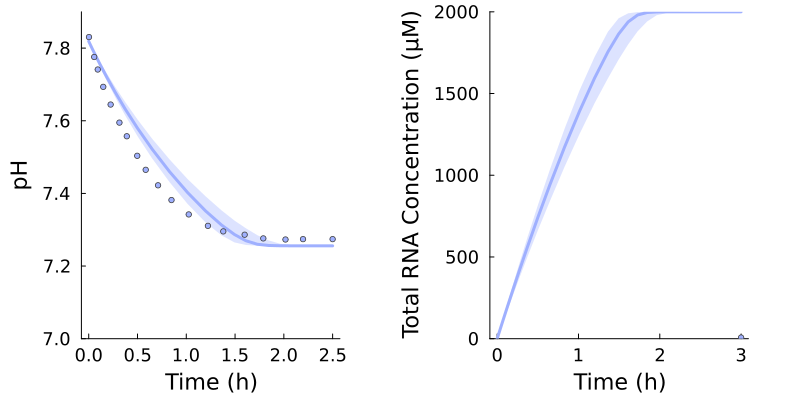

In [15]:
#Note that we are NOT "cheating" by using extra T7RNAP
kernfilename = "../data/external/kern/kern_pH.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kernfilename,range = 1:2:1,multiplot = false,maximumyield = false, labels = [""],bufferpKa = 7.5, NaperNTP = 3.85)
plot!(ylims = (7.00,7.9))
plt2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kernfilename,range = 2:2:2,multiplot = false, labels = [""],bufferpKa = 7.5, NaperNTP = 3.85)
kernplot = plot(plt1,plt2,size = (800,400),leftmargin = 5mm,bottommargin = 5mm)

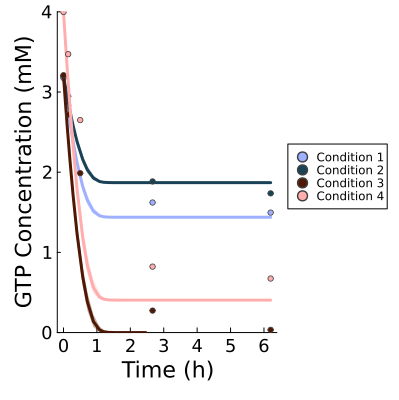

In [4]:
kernNTPfilename = "../data/external/kern/kern38NTP.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kernNTPfilename,range = [1,2,3,4],multiplot = false,maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.85)
plt1

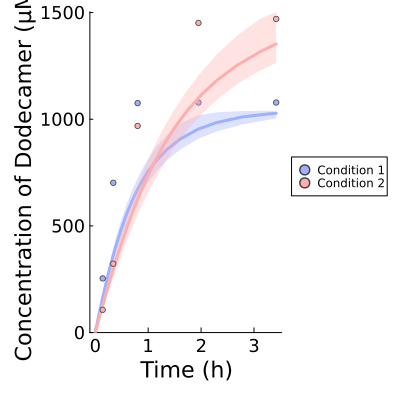

In [5]:
kern12filename = "../data/external/kern/kern99_12.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern12filename,range = [1,2],multiplot = false,maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.85)
plt1

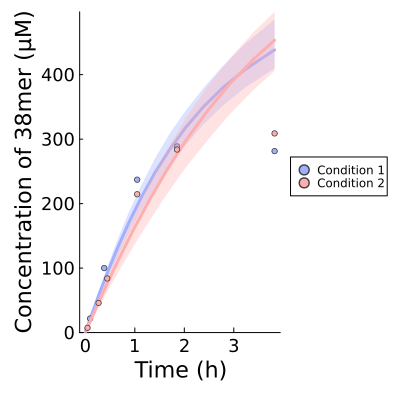

In [6]:
kern38filename = "../data/external/kern/kern99_38.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern38filename,range = [1,2],multiplot = false,maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.85)
plt1

In [7]:
times12 = [0
0.134408602
0.349462366
0.483870968
0.564516129
0.627240143
0.707885305
0.797491039
0.913978495
1.012544803
1.146953405
1.281362007
1.451612903
1.64874552
1.720430108
1.890681004
2.007168459
2.132616487
2.177419355
2.374551971
2.5
2.777777778
2.876344086
3.14516129
3.252688172
3.996415771
4.068100358
Inf]

vols12 = [0
0
62.30529595
62.30529595
84.73520249
84.73520249
103.4267913
103.4267913
132.0872274
132.0872274
171.9626168
171.9626168
223.0529595
223.0529595
242.9906542
242.9906542
276.635514
276.635514
286.6043614
286.6043614
321.4953271
321.4953271
337.694704
337.694704
353.894081
353.894081
366.3551402
366.3551402
];
function continuousfeedingschedule12(t)
    if t<2.66666666667
        UTPperliterfeed = 0.0815*25/60#In moles
        CTPperliterfeed = 0.142*25/60#In moles
        GTPperliterfeed = 0.220*25/60#In moles
        Mgperliterfeed = 0.753*25/60#In moles
        extraNaperliterfeed = 0.809/6#KOH addition
        bufferperliterfeed = 0.120*25/60
    else
        UTPperliterfeed = 0
        CTPperliterfeed = 0
        GTPperliterfeed = 0
        Mgperliterfeed = 0.186*25/35#In moles
        extraNaperliterfeed = 0.809/3.5#KOH addition
        bufferperliterfeed = 0.07*25/35
    end
    
    NaperNTP = 3.85
    v = getfeedingrate12(t)#liters per hour
    UTPrate = v*UTPperliterfeed
    CTPrate = v*CTPperliterfeed
    GTPrate = v*GTPperliterfeed
    Mgrate = v*Mgperliterfeed
    extraNarate = v*extraNaperliterfeed
    bufferrate = v*bufferperliterfeed
    Clrate = 0.40*bufferrate
    
    feeding = zeros(19)
    feeding[7] = 0
    feeding[8] = UTPrate
    feeding[9] = CTPrate
    feeding[10] = GTPrate
    feeding[12] = Mgrate
    feeding[15] = bufferrate
    feeding[16] = (UTPrate+CTPrate+GTPrate)*NaperNTP+extraNarate
    feeding[17] = Clrate
    feeding[18] = 2*Mgrate
    feeding[19] = v

    return feeding
end

function getfeedingrate12(t)
    timeindex = findfirst(times12 .> t)
    return (1/970)*(vols12[timeindex]-vols12[timeindex-1])/(times12[timeindex]-times12[timeindex-1])
end

getfeedingrate12 (generic function with 1 method)

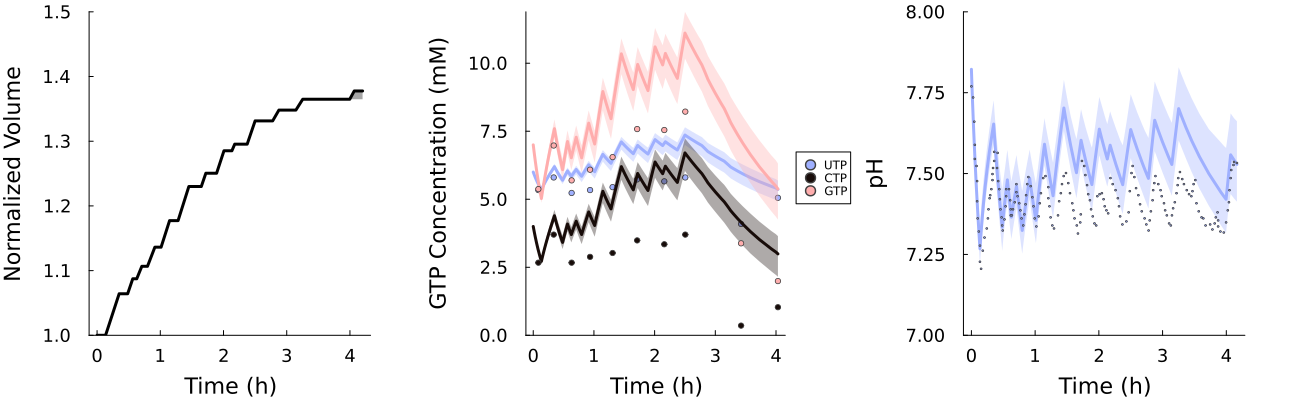

In [12]:
kern12filename = "../data/external/kern/kern99_12.csv"
discretefeedingschedule = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,7))
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]

pltNTP = plot()
plotfedbatchfromcsv!(pltNTP,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern12filename,discretefeedingschedules;labels = ["UTP", "CTP", "GTP"],continuousspeciesaddition = continuousfeedingschedule12,range = [4,5,6],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95)
pltpH = plot()
plotfedbatchfromcsv!(pltpH,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern12filename,discretefeedingschedules;markersize = 1,labels = [""],continuousspeciesaddition = continuousfeedingschedule12,range = [7],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95)
plot!(ylims = (7,8))
pltvol = plot()
plotfedbatchfromcsv!(pltvol,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern12filename,discretefeedingschedules;labels = [""],continuousspeciesaddition = continuousfeedingschedule12,range = [8],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95,colorscheme = :greys)
plot!(ylims = (1,1.5))
plt = plot(pltvol,pltNTP,pltpH,size = (1300,400),layout = (1,3),leftmargin = 7mm, bottommargin = 8mm)
savefig(plt,"../figures/GM6_27/12mer.png")
plt

In [9]:
times38 = [0.00
0.140280561
0.260521042
0.360721443
0.641282565
0.881763527
1.26252505
1.503006012
1.803607214
2.124248497
2.264529058
2.424849699
3.166332665
3.78757515
3.867735471
4.328657315
4.509018036
4.929859719
5.0501002
5.430861723
5.551102204
5.991983968
6.132264529
6.653306613
6.773547094
7.915831663
8.076152305
10.32064128
10.501002
Inf
]

vols38 = [6.37755102
6.37755102
21.68367347
21.68367347
68.87755102
68.87755102
125
125
168.3673469
168.3673469
190.0510204
190.0510204
289.5408163
289.5408163
302.2959184
302.2959184
332.9081633
332.9081633
355.8673469
355.8673469
372.4489796
372.4489796
385.2040816
385.2040816
401.7857143
401.7857143
424.744898
424.744898
445.1530612
445.1530612
];
function continuousfeedingschedule38(t)
    if t<4
        ATPperliterfeed = 0.1/3#In moles
        UTPperliterfeed = 0.084/3#In moles
        CTPperliterfeed = 0.154/3#In moles
        GTPperliterfeed = 0.180/3#In moles
        Mgperliterfeed = 0.904/3#In moles
        extraNaperliterfeed = 0.42/3#KOH addition tweaked from original value
        bufferperliterfeed = 0.150/3
    else
        ATPperliterfeed = 0#In moles
        UTPperliterfeed = 0#In moles
        CTPperliterfeed = 0.083/3#In moles
        GTPperliterfeed = 0#In moles
        Mgperliterfeed = 0.308/3#In moles
        extraNaperliterfeed = 0.42/3#KOH addition tweaked from original value
        bufferperliterfeed = 0.150/3
    end
    
    
    NaperNTP = 3.85
    v = getfeedingrate38(t)#liters per hour
    ATPrate = v*UTPperliterfeed
    UTPrate = v*UTPperliterfeed
    CTPrate = v*CTPperliterfeed
    GTPrate = v*GTPperliterfeed
    Mgrate = v*Mgperliterfeed
    extraNarate = v*extraNaperliterfeed
    bufferrate = v*bufferperliterfeed
    Clrate = 0.40*bufferrate
    
    feeding = zeros(19)
    feeding[7] = ATPrate
    feeding[8] = UTPrate
    feeding[9] = CTPrate
    feeding[10] = GTPrate
    feeding[12] = Mgrate
    feeding[15] = bufferrate
    feeding[16] = (ATPrate+UTPrate+CTPrate+GTPrate)*NaperNTP+extraNarate
    feeding[17] = Clrate
    feeding[18] = 2*Mgrate
    feeding[19] = v

    return feeding
end

function getfeedingrate38(t)
    timeindex = findfirst(times38 .> t)
    return (1/1000)*(vols38[timeindex]-vols38[timeindex-1])/(times38[timeindex]-times38[timeindex-1])
end

getfeedingrate38 (generic function with 1 method)

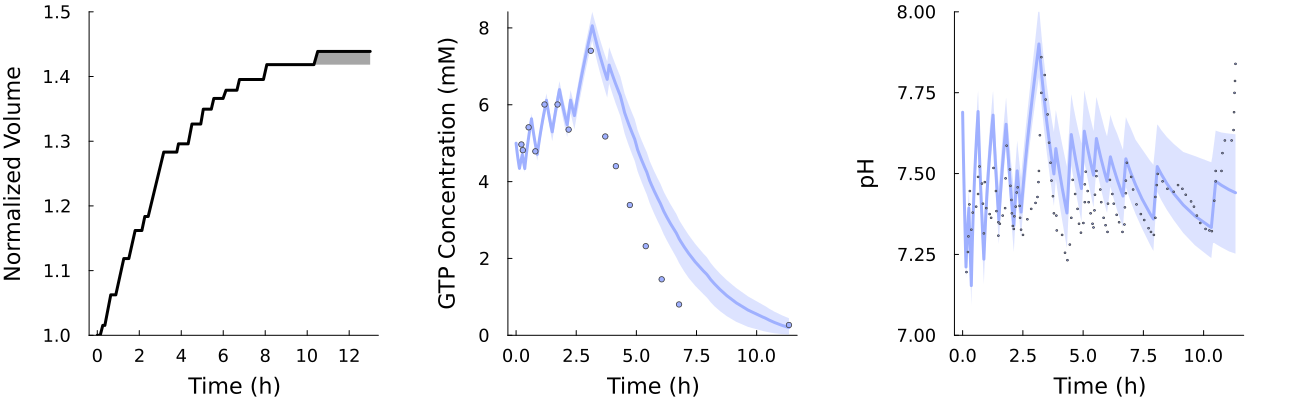

In [13]:
kern38filename = "../data/external/kern/kern99_38.csv"
discretefeedingschedule = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,7))
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
pltNTP = plot()
plotfedbatchfromcsv!(pltNTP,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern38filename,discretefeedingschedules;labels = [""],continuousspeciesaddition = continuousfeedingschedule38,range = [4],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95)
pltpH = plot()
plotfedbatchfromcsv!(pltpH,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern38filename,discretefeedingschedules;markersize = 1,labels = [""],continuousspeciesaddition = continuousfeedingschedule38,range = [5],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95)
plot!(ylims = (7.0,8.0))
pltvol = plot()
plotfedbatchfromcsv!(pltvol,fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kern38filename,discretefeedingschedules;labels = [""],continuousspeciesaddition = continuousfeedingschedule38,range = [6],maximumyield = false,precip = false,bufferpKa = 7.5, NaperNTP = 3.95,colorscheme = :greys)
plot!(ylims = (1,1.5))
plt = plot(pltvol,pltNTP,pltpH,size = (1300,400),layout = (1,3),leftmargin = 7mm, bottommargin = 8mm)
savefig(plt,"../figures/GM6_27/38mer.png")
plt

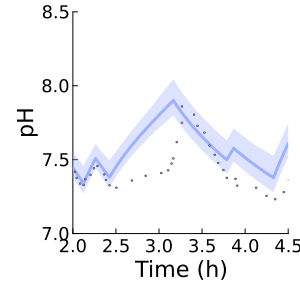

In [11]:
plot!(pltpH,xlims = (2.0,4.5),ylims = (7.0,8.5),legend = :none,size = (300,300))